In [2]:
import requests
Link="https://en.wikipedia.org/wiki/Rolls-Royce_Cullinan"
Link_text=requests.get(Link).text
print(Link_text)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Rolls-Royce Cullinan - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled 

In [3]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(Link_text, 'lxml')
print(soup)
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Rolls-Royce Cullinan - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled

In [4]:
print(soup.title.string)

Rolls-Royce Cullinan - Wikipedia


In [5]:
soup.find_all('a')

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en" title="Support us by donating to the Wikimedia Foundation"><span>Donate</span></a>,
 <a href=

In [6]:
all_table=soup.find_all('table')
print(all_table)

[<table class="infobox hproduct"><tbody><tr><th class="infobox-above fn" colspan="2" style="font-size:125%; background-color:#C0C0C0; padding:0.25em 1em; text-align:center;">Rolls-Royce Cullinan</th></tr><tr><td class="infobox-image" colspan="2"><span class="mw-default-size" typeof="mw:File/Frameless"><a class="mw-file-description" href="/wiki/File:2019_Rolls-Royce_Cullinan_V12_Automatic_6.75_Front.jpg"><img class="mw-file-element" data-file-height="2590" data-file-width="4149" decoding="async" height="175" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/2019_Rolls-Royce_Cullinan_V12_Automatic_6.75_Front.jpg/280px-2019_Rolls-Royce_Cullinan_V12_Automatic_6.75_Front.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/2019_Rolls-Royce_Cullinan_V12_Automatic_6.75_Front.jpg/420px-2019_Rolls-Royce_Cullinan_V12_Automatic_6.75_Front.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0d/2019_Rolls-Royce_Cullinan_V12_Automatic_6.75_Front.jpg/560px-2019_Rolls-Royce_C

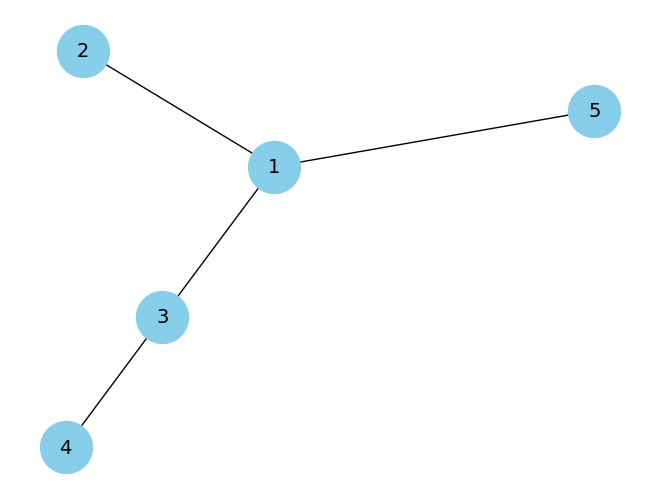

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(3,4),(5,1)])
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_color='skyblue',node_size=1400,edge_color='black',linewidths=1,font_size=14)
plt.show()

In [7]:
import requests
from bs4 import BeautifulSoup
import os

# Function to extract and download images from a webpage
def extract_images(url, folder_path):
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all image tags
        image_tags = soup.find_all('img')

        # Create a folder to store the images if it doesn't exist
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

        # Download and save each image
        for idx, img in enumerate(image_tags):
            img_url = img.get('src')
            if img_url:
                # Extract image name from URL
                img_name = os.path.join(folder_path, f"image_{idx}.jpg")

                # Download the image
                img_data = requests.get(img_url).content

                # Save the image to file
                with open(img_name, 'wb') as f:
                    f.write(img_data)

                print(f"Image {idx+1} downloaded successfully.")
    else:
        print("Failed to retrieve the webpage.")

# Example usage:
url = "https://www.cbssports.com/nfl/news/ranking-top-25-players-in-nfl-history-dick-butkus-has-prominent-place-on-leagues-all-time-list/"  # Replace with the URL of the website you want to scrape
folder_path = "downloaded_images"  # Folder where images will be saved
extract_images(url, folder_path)

Image 6 downloaded successfully.
Image 15 downloaded successfully.
Image 16 downloaded successfully.
Image 17 downloaded successfully.
Image 18 downloaded successfully.
Image 19 downloaded successfully.
Image 20 downloaded successfully.
Image 21 downloaded successfully.
Image 22 downloaded successfully.
Image 23 downloaded successfully.
Image 24 downloaded successfully.
Image 25 downloaded successfully.
Image 26 downloaded successfully.
Image 27 downloaded successfully.
Image 28 downloaded successfully.
Image 29 downloaded successfully.
Image 30 downloaded successfully.
Image 31 downloaded successfully.
Image 32 downloaded successfully.
Image 33 downloaded successfully.
Image 34 downloaded successfully.
